In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Generate Data

In [2]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation

def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    
    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

In [25]:
X, y = generate_data(10, 5)

In [26]:
X

array([[ 1.17316173, -0.14829036,  0.35069997, -0.34550707,  0.78351051],
       [ 3.48501523,  1.21359305,  0.31437972,  0.37044669, -0.40090772],
       [-1.34024035,  0.65322528, -1.19875838,  0.56260082, -0.28381421],
       [ 1.73365919,  2.59474218, -0.21480071,  0.2781818 , -0.458686  ],
       [-2.2905808 , -0.59070923, -0.47452319, -0.96142751,  1.23610331],
       [-4.35022205, -0.70888239, -0.57410941,  0.8612787 , -0.51226647],
       [-4.00464856,  0.5871997 ,  1.15609225,  0.59323605, -0.4859279 ],
       [ 1.63222972,  0.04374895, -0.08445321, -0.17251526, -0.42719499],
       [ 1.41135225, -0.61204583, -0.22479847,  0.30989695, -0.08861109],
       [-2.29299632,  0.95053766, -1.64835963,  0.45109465, -1.24067161]])

In [27]:
y

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

## View Data 

In [28]:
import pandas as pd
pd.set_option('precision',2)
df=pd.DataFrame(np.hstack([y.reshape(10,1),X]))
df.columns = ['y', 'X0', 'X1', 'X2', 'X2', 'X4']
print(df)

     y    X0    X1    X2    X2    X4
0  1.0  1.17 -0.15  0.35 -0.35  0.78
1  1.0  3.49  1.21  0.31  0.37 -0.40
2  0.0 -1.34  0.65 -1.20  0.56 -0.28
3  1.0  1.73  2.59 -0.21  0.28 -0.46
4  0.0 -2.29 -0.59 -0.47 -0.96  1.24
5  0.0 -4.35 -0.71 -0.57  0.86 -0.51
6  0.0 -4.00  0.59  1.16  0.59 -0.49
7  1.0  1.63  0.04 -0.08 -0.17 -0.43
8  1.0  1.41 -0.61 -0.22  0.31 -0.09
9  0.0 -2.29  0.95 -1.65  0.45 -1.24


## Testing the result between shrinkage

In [32]:
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)

for n_features in n_features_range: # change the number of features
    score_clf1, score_clf2 = 0, 0
    
    for _ in range(n_averages): # run lda for many times
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

## Show Result

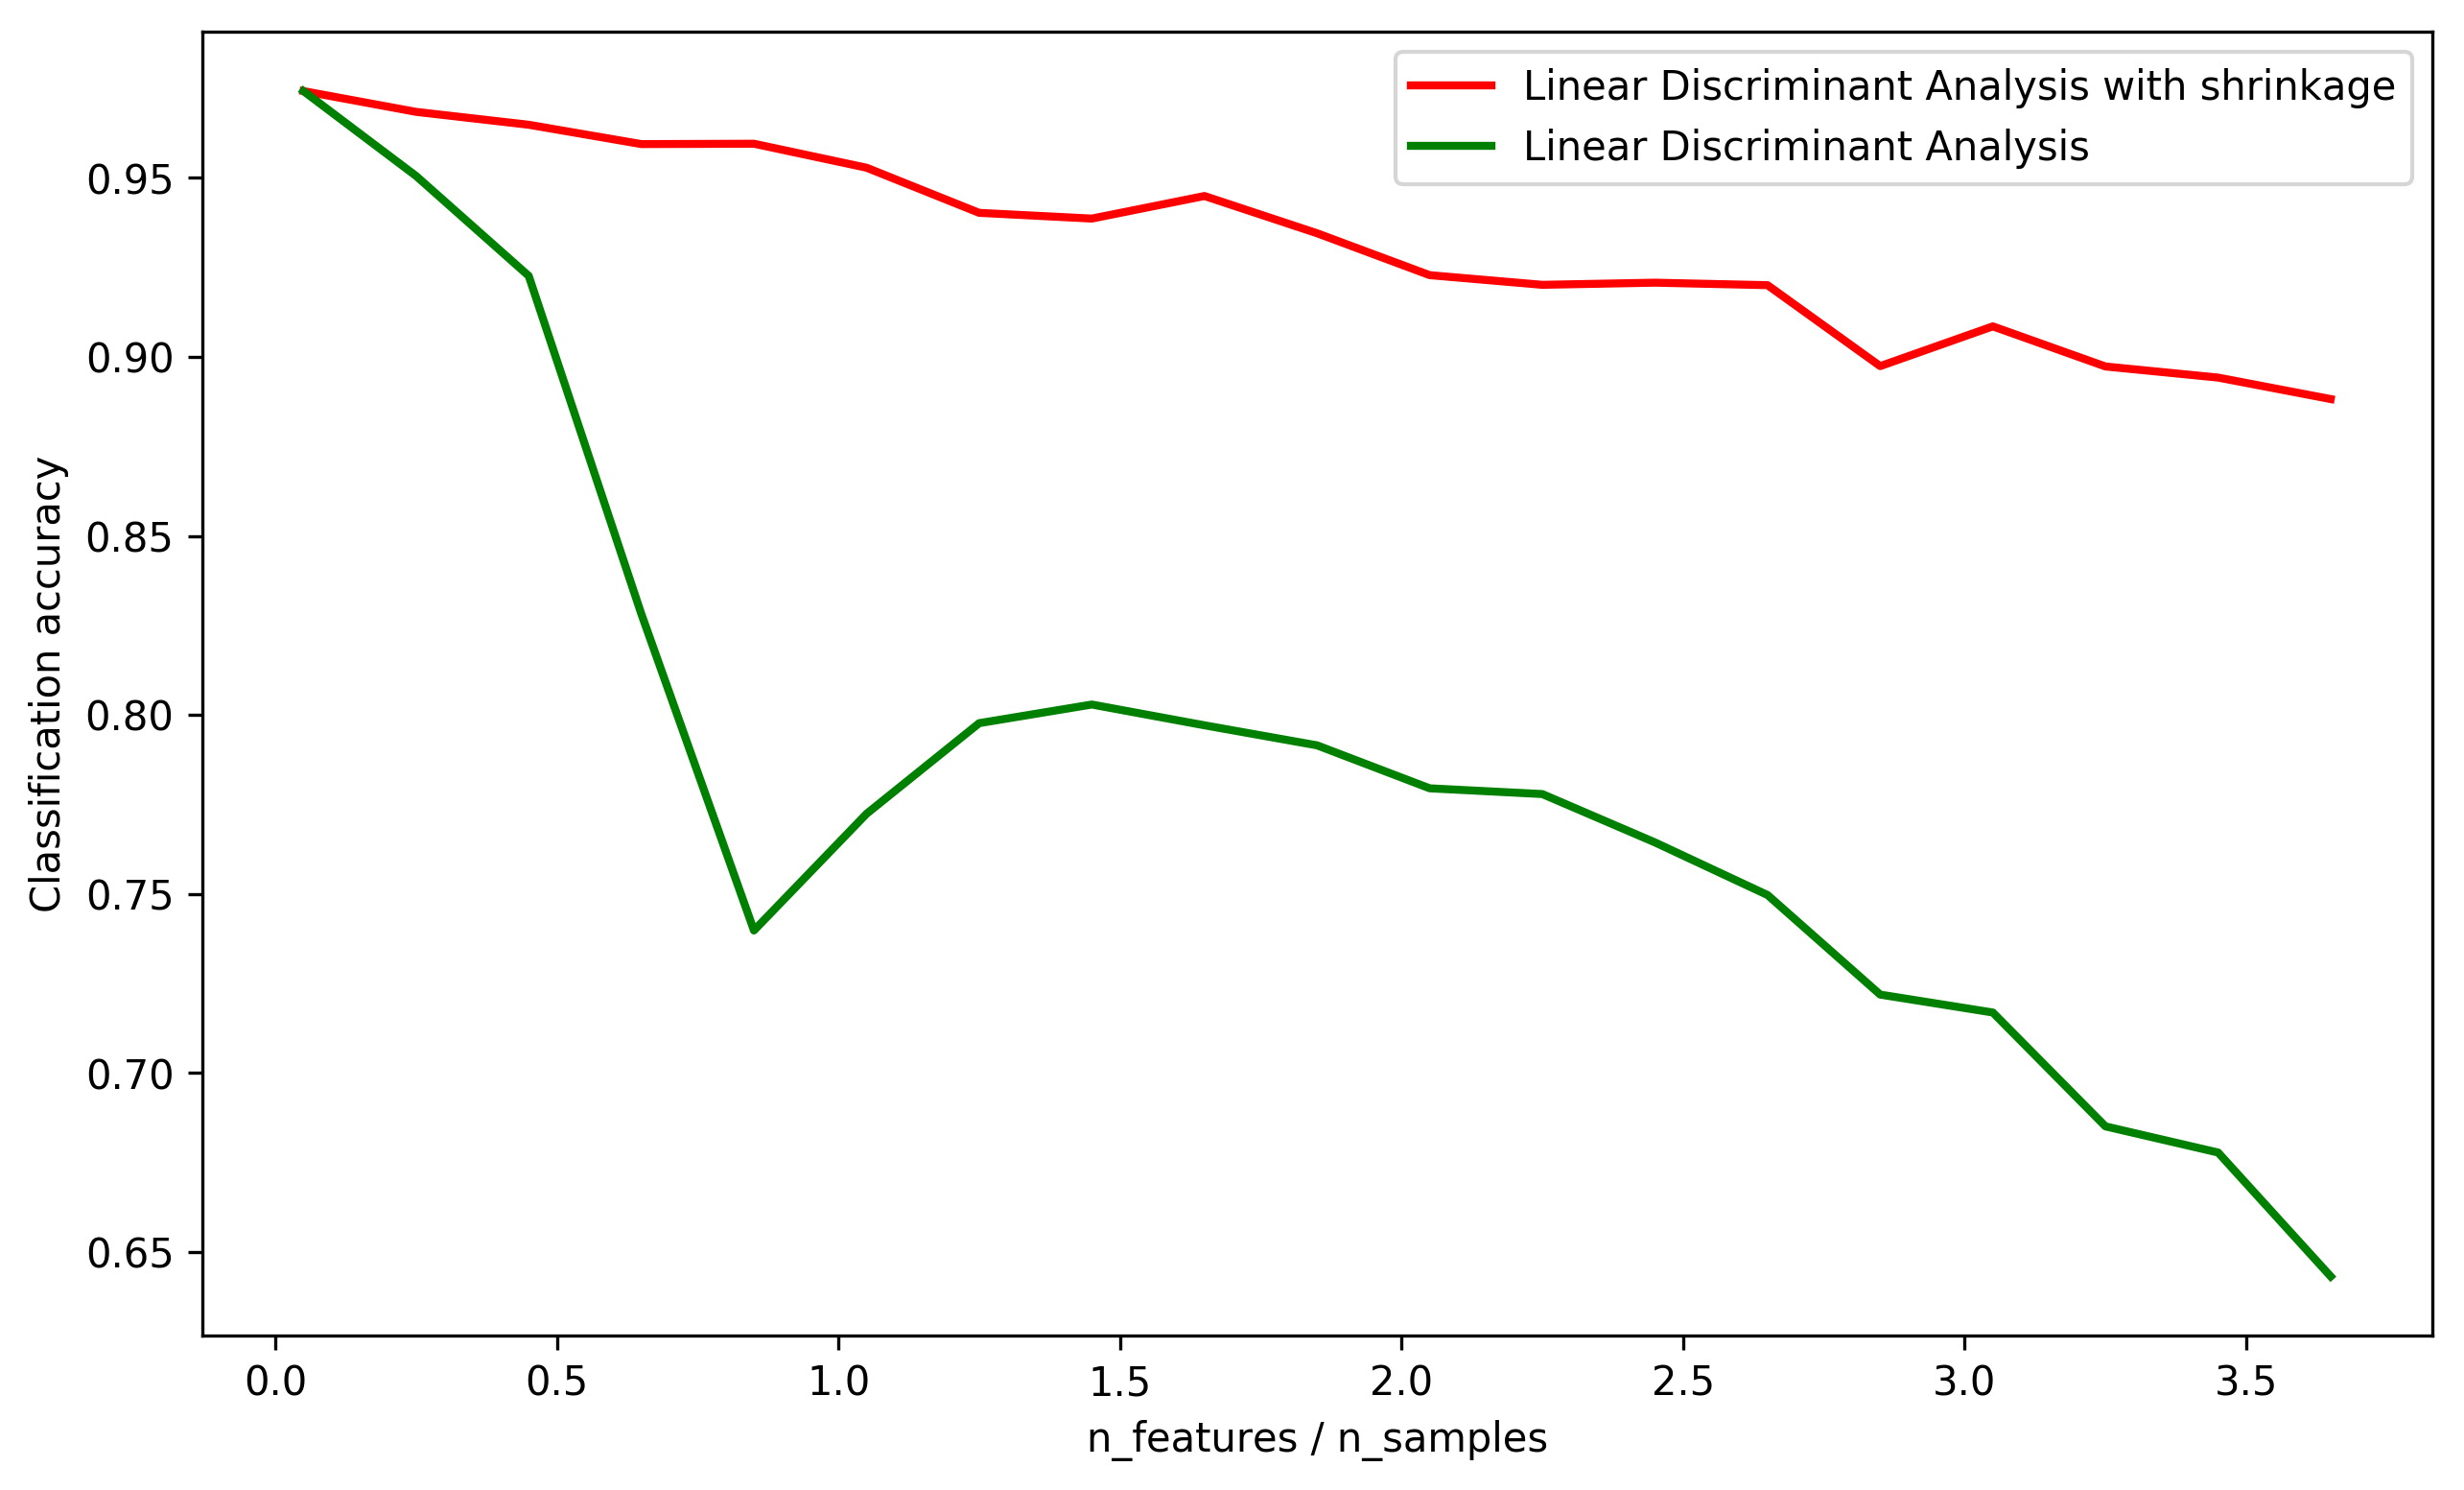

In [33]:
features_samples_ratio = np.array(n_features_range) / n_train
fig = plt.figure(figsize=(10,6), dpi=300)
plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='r')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='g')
plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 10})
plt.show()